Complete movies with budget and revenue: 3297
Hits: 2120 (64.30%)
Flops: 1177 (35.70%)

Logistic Regression Results:
Accuracy: 0.6758
F1 Score: 0.7752


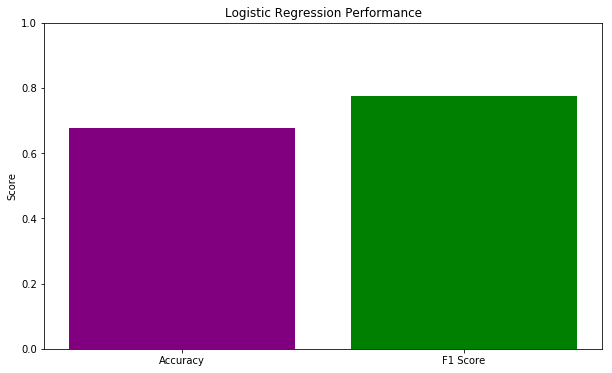

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the preprocessed data
df = pd.read_csv("./Filtered IMDb Movies TV Shows.csv")

# Convert Budget and Revenue to numeric
df['Budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['gross'], errors='coerce')

# Define hit/flop - 1 if revenue >= 2*budget, 0 otherwise
df['is_hit'] = np.where(df['gross'] >= 2*df['budget'], 1, 0)

# Filter to include only rows with both budget and revenue
df_complete = df.dropna(subset=['Budget', 'Revenue', 'is_hit'])

print(f"Complete movies with budget and revenue: {df_complete.shape[0]}")
print(f"Hits: {df_complete['is_hit'].sum()} ({df_complete['is_hit'].mean()*100:.2f}%)")
print(f"Flops: {df_complete.shape[0] - df_complete['is_hit'].sum()} ({(1-df_complete['is_hit'].mean())*100:.2f}%)")

features = ['budget', 'runtimeMinutes', 'averageRating', 'numVotes']

X = df_complete[features].copy()
y = df_complete['is_hit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Creates visualization
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'F1 Score']
scores = [accuracy, f1]

plt.bar(metrics, scores, color=['purple', 'green'])
plt.ylim(0, 1)
plt.title('Logistic Regression Performance')
plt.ylabel('Score')
plt.savefig('logistic_regression_performance.png', dpi=300)
plt.show()
